## Data Cleaning

Data is pulled from two sources:

1.   https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
2.   https://www.kaggle.com/datasets/mostafaabla/garbage-classification 

We use images for recyclable materials from the first link, and added trash and biological waste images from the second link to create more balanced classes. We have uploaded these folders to kaggle, and are available at this link:
https://www.kaggle.com/datasets/reesequillian/garbage-classification-recycle-trash


In [ ]:
!pip install python_splitter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 24.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from random import *
import random
import python_splitter
import tensorflow as tf
import cv2
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense


%matplotlib inline

In [ ]:
# pull data from github: 

!git clone https://github.com/rlq3fm/DS-4002-project2

# now we can access all data files

Cloning into 'DS-4002-project2'...
remote: Enumerating objects: 4087, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 4087 (delta 1), reused 7 (delta 1), pack-reused 4074
Receiving objects: 100% (4087/4087), 49.83 MiB | 28.58 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
src_folder = "/content/DS-4002-project2/data"

In [ ]:
# split into testing and training
# https://github.com/bharatadk/python_splitter

python_splitter.split_from_folder(src_folder, train = 0.7, test = 0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


Using the python_splitter, we now have a folder of testing and training images to use in the model, with a 70/30 split.  

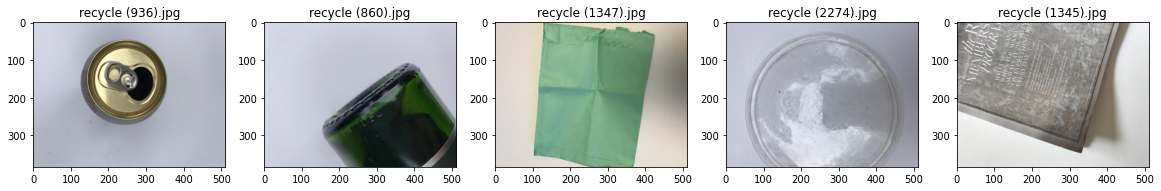

In [ ]:
len(os.listdir("/content/Train_Test_Folder/test/recycle"))
len(os.listdir("/content/Train_Test_Folder/test/trash"))


len(os.listdir("/content/Train_Test_Folder/train/recycle"))
len(os.listdir("/content/Train_Test_Folder/train/trash"))


# printing random images from a folder to make sure they loaded correctly
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir("/content/Train_Test_Folder/train/recycle"))
    image_path= os.path.join("/content/Train_Test_Folder/train/recycle", file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Now that the images are loaded, we need to turn them into arrays and normalize them so that we can give them to the model. Pixels range in value from 0-255, which represent color codes, so we can divide each by 255.

We use a function written by Renu Khandelwal (https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6)


In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder="/content/Train_Test_Folder/train"

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
# extract the image array and class name for train dataset
train_img_data, train_class_name = create_dataset(img_folder)

In [ ]:
# extract the image array and class name for test dataset
test_img_folder="/content/Train_Test_Folder/test"
test_img_data, test_class_name = create_dataset(test_img_folder)

In [ ]:
# dictionary for classes
train_class_dict={k: v for v, k in enumerate(np.unique(train_class_name))}
test_class_dict={k: v for v, k in enumerate(np.unique(test_class_name))}

In [ ]:
train_target_val= [train_class_dict[train_class_name[i]] for i in range(len(train_class_name))]
test_target_val = [test_class_dict[test_class_name[i]] for i in range(len(test_class_name))]

In [ ]:
train_img_data[0:1]
# first image in array format

[array([[[0.9372549 , 0.9137255 , 0.91764706],
         [0.9372549 , 0.9137255 , 0.91764706],
         [0.94509804, 0.92156863, 0.9254902 ],
         ...,
         [0.89411765, 0.87058824, 0.8745098 ],
         [0.89411765, 0.87058824, 0.8745098 ],
         [0.89411765, 0.87058824, 0.8745098 ]],
 
        [[0.9372549 , 0.9137255 , 0.91764706],
         [0.9372549 , 0.9137255 , 0.91764706],
         [0.94509804, 0.92156863, 0.9254902 ],
         ...,
         [0.89411765, 0.87058824, 0.8745098 ],
         [0.89411765, 0.87058824, 0.8745098 ],
         [0.89411765, 0.87058824, 0.8745098 ]],
 
        [[0.9372549 , 0.9137255 , 0.91764706],
         [0.9372549 , 0.9137255 , 0.91764706],
         [0.94509804, 0.92156863, 0.9254902 ],
         ...,
         [0.89411765, 0.87058824, 0.8745098 ],
         [0.89411765, 0.87058824, 0.8745098 ],
         [0.89411765, 0.87058824, 0.8745098 ]],
 
        ...,
 
        [[0.70980394, 0.47843137, 0.05882353],
         [0.6313726 , 0.41568628, 0.01176

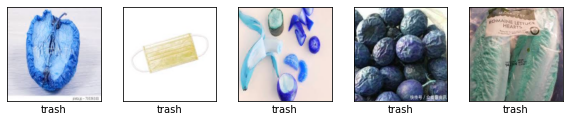

In [ ]:
# making sure images look right still
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img_data[randint(1,1000)])
    plt.xlabel(train_class_name[i])
plt.show()

## Exploratory Data Analysis

Checking the balance of classes (recycle/trash) between testing and training sets

In [ ]:
## Creating df of num images per each train/test set by class

train = "/content/Train_Test_Folder/train"
test = "/content/Train_Test_Folder/test"

train_recycle = train + "/recycle"
test_recycle = test + "/recycle"
train_trash = train + "/trash"
test_trash = test + "/trash"

# Creating dict + df of class and len(class)

numImages_by_class_train = {   # df of Train, w/ respective recycle & trash nums
    'Class':['Recyclables','Trash'],
    'Num_images':[len(os.listdir(train_recycle)), len(os.listdir(train_trash))]}

numImages_by_class_test = {   # df of Test, w/ respective recycle & trash nums
    'Class':['Recyclables','Trash'],
    'Num_images':[len(os.listdir(test_recycle)), len(os.listdir(test_trash))]}

df_train = pd.DataFrame(numImages_by_class_train)
df_test = pd.DataFrame(numImages_by_class_test)

print(df_train)
print(df_test)


         Class  Num_images
0  Recyclables        1673
1        Trash        1177
         Class  Num_images
0  Recyclables         717
1        Trash         505


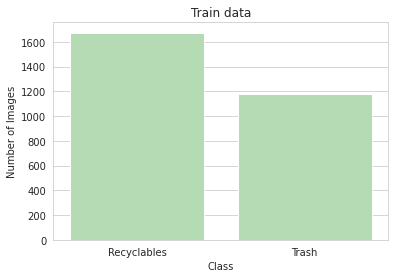

In [ ]:
## Class balance bar plot for Train

sns.set_style("whitegrid")

p1_train = sns.barplot(data=df_train, x='Class', y='Num_images',
                  order=['Recyclables','Trash'],
                  color='#AFE1AF')   

plt.title("Train data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

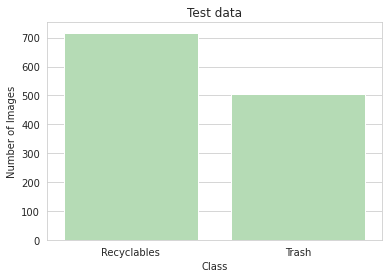

In [ ]:
## Class balance bar plot for Test

sns.set_style("whitegrid")

p1_test = sns.barplot(data=df_test, x='Class', y='Num_images',
                  order=['Recyclables','Trash'],
                  color='#AFE1AF')   

plt.title("Test data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


Checking image heights and widths
- This is an important step when applying deep learning techniques, since mismatches can lead to differences in predictive outcome

Text(0, 0.5, 'Height')

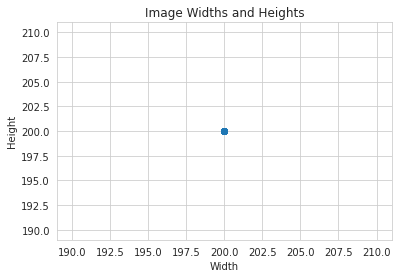

In [ ]:

# Following cv2 package to check image shapes
## already set sizes to 200 earlier but double-checking to be sure


img_shapes = pd.DataFrame(columns=["width","height"])

for image in train_img_data:
  h,w,c = image.shape
  width_height = pd.DataFrame({'width':[w],'height':[h]})
  img_shapes = pd.concat([img_shapes,width_height])

img_shapes.head()


plt.scatter(img_shapes['width'],img_shapes['height'])
plt.title("Image Widths and Heights")
plt.xlabel("Width")
plt.ylabel("Height")

## Model

Build CNN Model by adding layers

In [ ]:
# https://keras.io/api/models/sequential/ - information about Sequential class
# https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/ - description of each layer
# https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4 - code for model building process

# create base model with Sequential class which groups a linear stack of layers into a model
model = models.Sequential()

# add Convolutional layer with 32 filters of size 3x3 and applying ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))

# add max pooling layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# transform to 3D feature map to 1D input tensor 
model.add(layers.Flatten())

# create fully connected layers with Dense function
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 135424)            0

Compile and Train Model

In [ ]:
# convert input lists to numpy arrays

train_target_val = np.array(train_target_val)
train_img_data = np.array(train_img_data)
test_target_val= np.array(test_target_val)
test_img_data = np.array(test_img_data)

In [ ]:
# compile model with Categorical CrossEntropy loss function and output accuracy and loss at each epoch

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle
history = model.fit(train_img_data, train_target_val, epochs=3, 
                    validation_data=(test_img_data, test_target_val))

Epoch 1/3
90/90 [==============================] - 270s 3s/step - loss: 0.6514 - accuracy: 0.7242 - val_loss: 0.4843 - val_accuracy: 0.7954
Epoch 2/3
90/90 [==============================] - 251s 3s/step - loss: 0.3772 - accuracy: 0.8379 - val_loss: 0.3876 - val_accuracy: 0.7840
Epoch 3/3
90/90 [==============================] - 247s 3s/step - loss: 0.2189 - accuracy: 0.9140 - val_loss: 0.1778 - val_accuracy: 0.9280


Calculate accuracy at each epoch

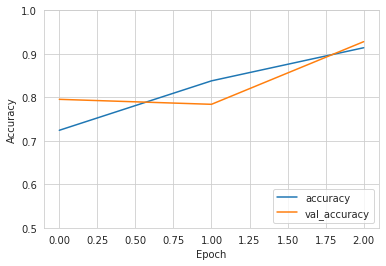

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Plot the loss at each epoch

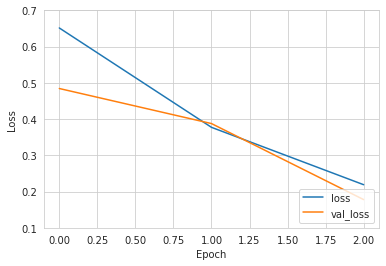

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.1, 0.7])
plt.legend(loc='lower right')

Find the final accuracy value of our model

In [ ]:
#https://www.kaggle.com/code/anandhuh/image-classification-using-cnn-for-beginners/notebook

test_loss, test_acc = model.evaluate(test_img_data,
                                     test_target_val,
                                     verbose=2)
print("The test accuracy is " + str(round(test_acc,2)*100))

The test accuracy is 93.0
